In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn import linear_model


In [20]:
df = pd.read_csv("FuelConsumption.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [22]:
print(df.info())
print("\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

In [24]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

Lets pick the Significant data columns

In [32]:
df.columns
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


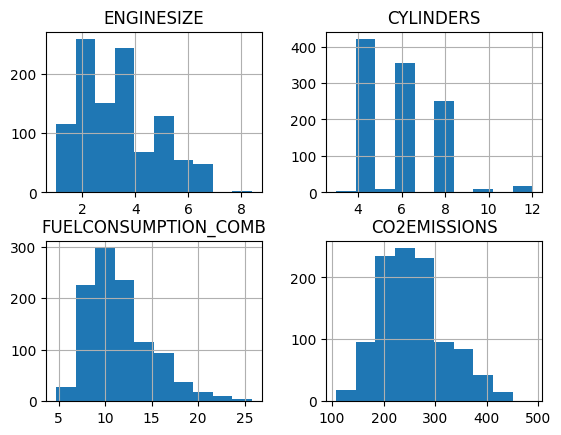

In [35]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

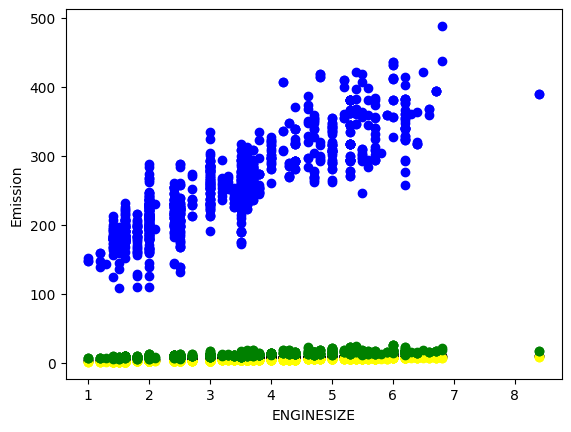

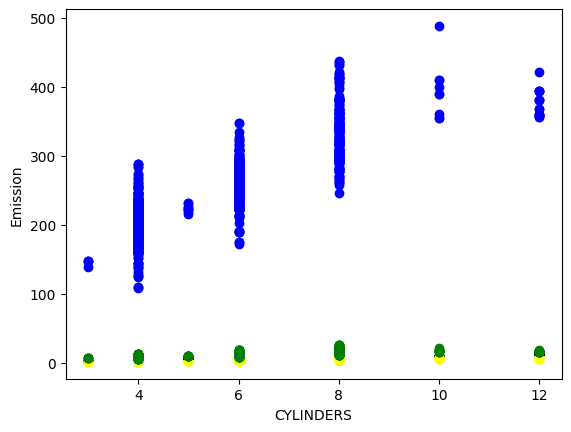

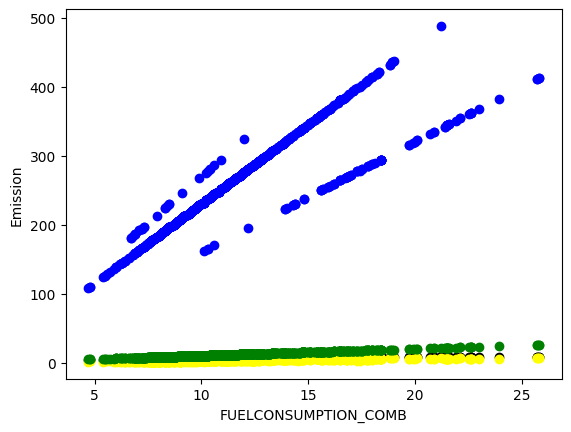

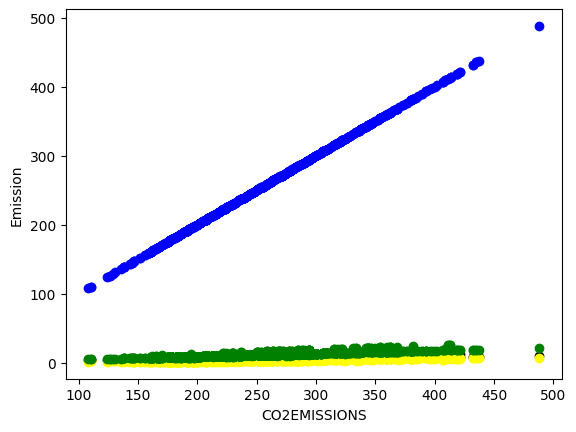

In [52]:
for i in cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]:
    plt.scatter(cdf[i],cdf['CO2EMISSIONS'],color ='blue')
    plt.scatter(cdf[i],cdf['CYLINDERS'],color ='BLACK')
    plt.scatter(cdf[i],cdf['ENGINESIZE'],color ='YELLOW')
    plt.scatter(cdf[i],cdf['FUELCONSUMPTION_COMB'],color ='GREEN')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()

In [55]:
#CREATE TRAIN AND TEST DATA
mask = np.random.rand(len(df)) < 0.80
train = cdf[mask]
test = cdf[~mask]
print(train)
print("----------------------")
print(test)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
4            3.5          6                  10.6           244
6            3.5          6                  10.1           232
...          ...        ...                   ...           ...
1058         3.0          6                  11.5           264
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1066         3.2          6                  12.8           294

[855 rows x 4 columns]
----------------------
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
3            3.5          6                  11.1           255
5            3.5          6                  10.0        

In [61]:
coefficient = []
intercept =[]
regress_model = {}
for i in train[['ENGINESIZE','CYLINDERS']]:
    regr = linear_model.LinearRegression()
    train_x = np.asanyarray(train[[i]])
    train_y = np.asanyarray(train[['CO2EMISSIONS']])
    regr.fit(train_x,train_y)
    regress_model[i] = regr
    print("Relation between {} & {}".format(i,"'CO2EMISSIONs'"))
    print('Intercept:', regr.coef_)
    print('Intercept:',regr.intercept_)
    coefficient.append(regr.coef_)
    intercept.append(regr.intercept_)
    print('\n')

Relation between ENGINESIZE & 'CO2EMISSIONs'
Intercept: [[38.90155266]]
Intercept: [124.61799816]


Relation between CYLINDERS & 'CO2EMISSIONs'
Intercept: [[30.15671856]]
Intercept: [80.34428365]


